In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


In [153]:
data= pd.read_csv('Salary_dataset.csv',index_col=0)

In [154]:
print("\nData info:")
print(data.shape)



Data info:
(30, 2)


In [155]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000


In [156]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
YearsExperience    0
Salary             0
dtype: int64


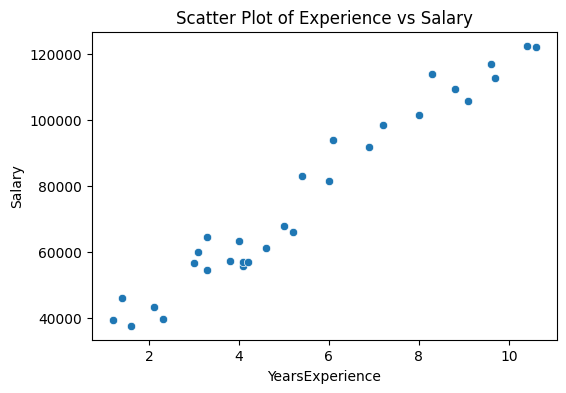

In [157]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data.iloc[:,0], y=data.iloc[:,1])
plt.title('Scatter Plot of Experience vs Salary')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()

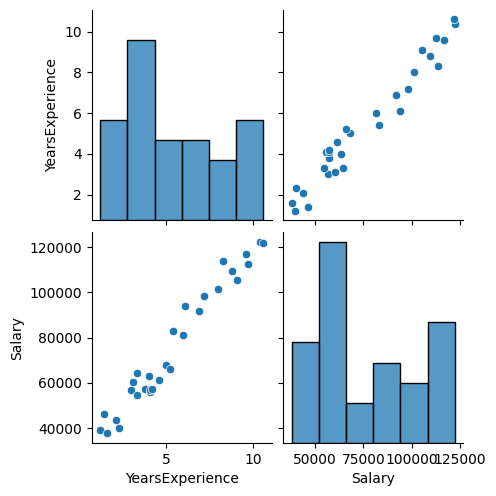

In [158]:
sns.pairplot(data)
plt.show()

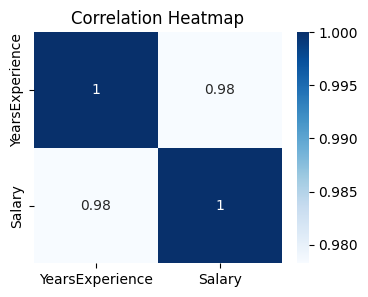

In [159]:
plt.figure(figsize=(4,3))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [160]:
# Define features and target
X = data[['YearsExperience']]# Feature (e.g., Years of Experience)
y = data[['Salary']]

# Data normalization

In [161]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [162]:
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [163]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression

In [164]:
#Build and Train Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
 
#Make Predictions
y_pred = model.predict(X_test)

# Evaluation

In [170]:
#Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")



Model Evaluation:
Mean Absolute Error: 6286.45
Root Mean Squared Error: 7059.04


Mean Absolute Error (MAE): 6286.45
* On average, the model's predictions are off by about $6,286.45.
* This gives us a sense of the average size of the errors, without considering whether they are over or under predictions.

Root Mean Squared Error (RMSE): 7059.04
* The RMSE is a bit higher than the MAE, at $7,059.04.
* This metric penalizes larger errors more heavily, meaning that while the MAE gives us an idea of the typical error, the RMSE reflects the impact of bigger mistakes.
* The higher RMSE suggests that the model might sometimes make larger prediction errors, though overall, it's still a good indication of the model’s performance.

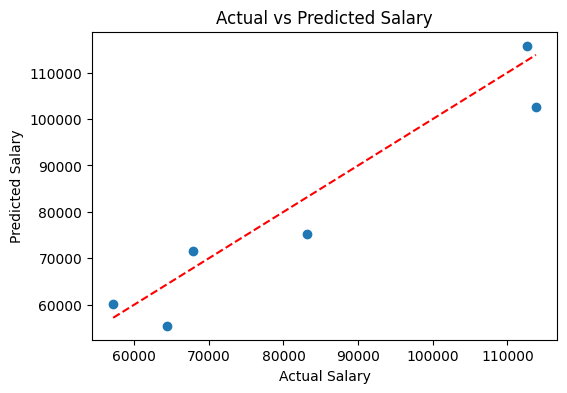

In [151]:
# Plot actual vs predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()